<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name:** Kristen Tortorelli

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



# Workflow Pseudocode

1. Open data for single landsat scene/date:
    * Get list of .tif files in folder for single scene/date with glob.
    * Subset list to grab only bands 4 and 5 (those needed to calculate NDVI).
    * Sort file list. 
    * Open and crop bands with open_rasterio using shp file in data directory. 
2. Calculate average NDVI value for single landsat scene/date. 

3. Get list of all landsat dates/scenes folders for one site using glob.
4. Use steps 1 and 2 above to get average NDVI value for each scene. 
    * Grab date and site from file name. 
5. Save NDVI, date, and site for each date/scene to pandas df. 
6. Export pandas dataframe with mean_ndvi, site, and date to csv file. 


In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)

# Import necessary libraries
import os
from glob import glob
import shutil

import matplotlib.pyplot as plt
from matplotlib import patches as mpatches, colors
from datetime import datetime
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
from numpy import ma
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
import earthpy.mask as em
import earthpy.spatial as es

# Set consistent plotting style
sns.set_style("white")
sns.set(font_scale=1.5)

# Download the data
data = et.data.get_data('ndvi-automation')

# Create variable for data path
data_path = os.path.join(et.io.HOME, 'earth-analytics', 'data')

# Check that path exists and if so set to working directory
if os.path.exists(data_path):
    print("This directory exists, and is set to current working directory.")
    os.chdir(data_path)

# If directory does not exist, create it and set to working directory
else:
    print("This directory does not exist, but is being created.")
    os.mkdir(data_path)
    os.chdir(data_path)

This directory exists, and is set to current working directory.


In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [5]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!

# Define custom functions

def normalized_diff(b1, b2):
    """Take two numpy arrays and calculate the normalized difference.
    Math will be calculated (b1-b2) / (b1+b2). The arrays must be of the
    same shape.

    Parameters
    ----------
    b1, b2 : numpy arrays
        Two numpy arrays that will be used to calculate the normalized difference.
        Math will be calculated (b1-b2) / (b1+b2).

   Returns
    ----------
    n_diff : numpy float
        The average of element-wise result of (b1-b2) / (b1+b2) calculation. Inf values are set
        to nan. Array returned as masked if result includes nan values.
    """
    if not (b1.shape == b2.shape):
        raise ValueError("Both arrays should have the same dimensions")

    n_diff = (b1 - b2) / (b1 + b2)

    # Set inf values to nan and provide custom warning
    if np.isinf(n_diff).any():
        warnings.warn(
            "Divide by zero produced infinity values that will be replaced with nan values",
            Warning)
        n_diff[np.isinf(n_diff)] = np.nan

    # Mask invalid values
    if np.isnan(n_diff).any():
        n_diff = np.ma.masked_invalid(n_diff)

    # Calculate average NDVI value with np.mean
    avg_ndvi = np.mean(n_diff)

    return avg_ndvi


def process_bands(paths, path_to_crop, stack=False):
    """
    Open, clean and crop a list of raster files using rioxarray.

    Parameters
    ----------
    paths : list
        A list of paths to raster files that could be stacked (of the same 
        resolution, crs and spatial extent).

    path_to_crop : string
        A string path to the geodataframe containing the crop geometry that 
        you wish to crop your data to.

    stack : boolean
        If True, return a stacked xarray object. If false will return a list
        of xarray objects.

    Returns
    -------
        Either a list of xarray objects or a stacked xarray object
    """

    crop_layer = gpd.read_file(path_to_crop)
    clip_bound = crop_layer.geometry
    all_bands = []
    ndvi_values = []

    for i, aband in enumerate(paths):

        cleaned_band = rxr.open_rasterio(aband,
                                         masked=True).rio.clip(clip_bound,
                                                               from_disk=True).squeeze()
        # Clean the data
        valid_range = (0, 10000)
        # Only run this step if a valid range tuple is provided
        if valid_range:
            mask = ((cleaned_band < valid_range[0]) | (
                cleaned_band > valid_range[1]))
            cleaned_band = cleaned_band.where(
                ~xr.where(mask, True, False))

        cleaned_band["band"] = i+1
        all_bands.append(cleaned_band)

    if stack:
        return xr.concat(all_bands, dim="band")
    else:
        print("Returning a list of xarray objects.")
        return all_bands


def remove_clouds(path_to_qa):
    """Opens landsat qa file, selects cloud/shadow values, creates cloud mask.

    Parameters
    ----------
    path_to_qa : string
        Path to pixel_qa file in landsat data that will be used to clean data
        for presence of clouds and shadows.

    Returns
    ----------
    cl_mask : xarray object
        The cloud mask xarray object that will be used to clean landsat data.
        """

    landsat_qa = rxr.open_rasterio(path_to_qa).squeeze()

    high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
    cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
    cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

    all_masked_values = cloud_shadow + cloud + high_cloud_confidence
    cl_mask = landsat_qa.isin(all_masked_values)

    return cl_mask


def combine_scenes(path_to_all_scenes, crop_path):
    """Open, cleans, crops list of raster files, cleans data with cloud mask, 
    captures average ndvi, date, and site name and saves to pandas df. 

    Parameters
    ----------
    path_to_all_scenes: string
        Path to directory with all landsat scenes/date folders to be combined.
    crop_path: string
        A string path to the geodataframe containing the crop geometry that 
        you wish to crop your data to.

    Returns
    ----------
    df : pandas dataframe
        Dataframe containing average NDVI values, date, and site name. 
        """

    dates_temp = []
    ndvi_values_temp = []

    for ascene in path_to_all_scenes:
        paths_list = sorted(glob(os.path.join(ascene, "*band[4-5]*.tif")))
        landsat_scene = process_bands(paths_list, crop_path, stack=True)

        # Mask data with pixel QA layer
        qa_path = glob(os.path.join(ascene, '*pixel_qa.tif'))
        landsat_scene_cl_free = landsat_scene.where(
            ~remove_clouds(qa_path[0]))

        landsat_scene_ndvi = normalized_diff(
            landsat_scene_cl_free[1], landsat_scene_cl_free[0])

        ndvi_values_temp.append(landsat_scene_ndvi)

        date = ascene[50:58]
        datetime_object = datetime.strptime(date, '%Y%m%d')
        dates_temp.append(datetime_object)

        df = pd.DataFrame({'mean_ndvi': ndvi_values_temp}, index=dates_temp)
        df['site'] = ascene[22:26]

    df['mean_ndvi'] = df['mean_ndvi'].apply(pd.to_numeric, errors='coerce')
    df.drop(df[df['mean_ndvi'] == 0].index, inplace=True)

    return df

# Using Functions for Optimized Code 
These functions defined above help to make my notebook code more efficient and optimized. Instead of repeating several lines of code for every time I need to calculate NDVI, open/clean/crop a list of raster files, remove cloud interference from landsat data, or combine NDVI values for several sites/scenes into a pandas dataframe, I can use the functions defined above. These functions reduce the potential for error, make it easier to add more data to this analysis, and help someone else understand my code better. 

In [6]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Call the dataframe at the end of the cell so the tests run on it!
# Be sure that the date column is an index of type date
# HINT: the time series lessons may help you remember how to do this!

# Define paths to data and crop geodataframe files
landsat_dirpath_harv = os.path.join("ndvi-automation",
                                    "sites",
                                    "HARV",
                                    "landsat-crop",
                                    "LC080130302017031701T1-SC20181023151837",
                                    "*band[4-5]*.tif")
crop_dirpath_harv = os.path.join("ndvi-automation",
                                 "sites",
                                 "HARV",
                                 "vector",
                                 "HARV-crop.shp")

crop_dirpath_sjer = os.path.join("ndvi-automation",
                                 "sites",
                                 "SJER",
                                 "vector",
                                 "SJER-crop.shp")

# Open crop files for both sites with geopandas
harv_crop = gpd.read_file(crop_dirpath_harv)
sjer_crop = gpd.read_file(crop_dirpath_sjer)

# Sort list of .tif files for single date in HARV landsat data
landsat_paths_harv = sorted(glob(landsat_dirpath_harv))

# Open, clean, and crop data for single date with process_bands
landsat_harv_march = process_bands(
    landsat_paths_harv, crop_dirpath_harv, stack=True)

# Calculate average NDVI for this date with normalized_diff
landsat_harv_ndvi = normalized_diff(
    landsat_harv_march[1], landsat_harv_march[0])

# Save NDVI value, date, and site name to pandas df
ndvi_values = [landsat_harv_ndvi]

date_single = '20170317'
datetime_object_single = [datetime.strptime(date_single, '%Y%m%d')]

df_harv_single_date = pd.DataFrame(
    {'mean_ndvi': ndvi_values}, index=datetime_object_single)
df_harv_single_date['site'] = 'HARV'
df_harv_single_date

,mean_ndvi,site
2017-03-17,0.281132,HARV


In [7]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

# Data Source for Above Analysis
The data I used for the analysis above is landsat data collected on March 17, 2017 over the Harvard Forest (HARV) site in the Eastern United States. I used only bands 4 and 5 (Red and NIR) for this analysis, since NDVI uses only those two bands in the calculation. I cropped this data to our specific area of interest (defined in the crop geodataframe object provided with data). I used the process_bands function to open, clean, and crop the data, and I used the normalized_diff function to calculate NDVI. I then saved this information (along with site name and date) to a pandas dataframe.  

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

In [8]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Don't forget to set date as the index and make the values of type datetime

# Define paths to all dates/scenes in both sites
landsat_scenes_harv = os.path.join("ndvi-automation",
                                   "sites",
                                   "HARV",
                                   "landsat-crop",
                                   "*")

landsat_scenes_sjer = os.path.join("ndvi-automation",
                                   "sites",
                                   "SJER",
                                   "landsat-crop",
                                   "*")

    # Sort lists
landsat_scene_paths_harv = sorted(glob(landsat_scenes_harv))
landsat_scene_paths_sjer = sorted(glob(landsat_scenes_sjer))

# Use combine_sites to find average ndvi values for all dates for both sites
df1 = combine_scenes(landsat_scene_paths_harv, crop_dirpath_harv)
df2 = combine_scenes(landsat_scene_paths_sjer, crop_dirpath_sjer)

# Combine pandas dataframes for both sites
dfs = [df1, df2]

mean_ndvi_df_total = pd.concat(dfs)
mean_ndvi_df_total

,mean_ndvi,site
2017-03-17,0.281132,HARV
2017-04-02,0.251133,HARV
2017-04-18,0.541080,HARV
2017-05-04,0.568924,HARV
2017-05-20,0.811310,HARV
2017-06-21,0.881739,HARV
2017-07-23,0.819768,HARV
2017-08-24,0.864464,HARV
2017-09-09,0.857701,HARV
2017-09-25,0.840639,HARV


In [9]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points +=2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points +=2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points +=3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points +=3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
❌ The amount of null data in your dataframe is incorrect.
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:07.318578.

 ➡ You received 8 out of 10 points for creating a dataframe.


8

# Data Sources and Analysis Process 
The data I used in the above analysis are landsat data for two sites (San Joaquin Experimental Range (SJER) in Southern California and Harvard Forest (HARV) in the Eastern United States). The data spans several dates in the year of 2017, but after removing clouds and cleaning the data, there are only valid mean_ndvi values from March to December 2017. Again, I used only bands 4 and 5 in each scene to calculate average NDVI, and I cropped the data to our AOI. 

I used the process_bands, normalized_diff, and remove_clouds functions within the combine_scenes function. The combine_scenes functions opens and cleans several raster files, removes cloud interference, calculates average NDVI for each scene, and combines those values with the dates and site names in a pandas dataframe. 

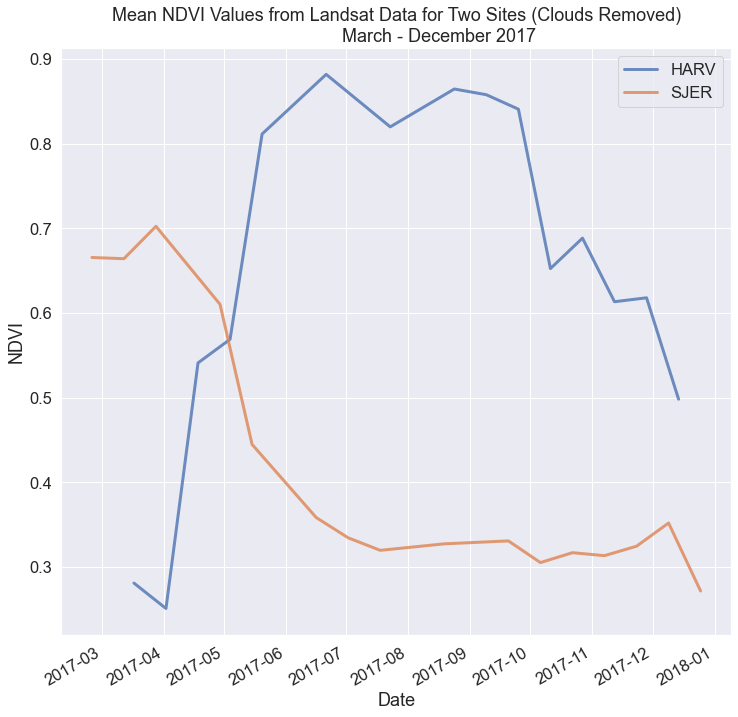

In [10]:
# Add only the plot code to this cell

# This is the final figure of mean NDVI
# for both sites across the year
# with data cleaned to deal with clouds

# Plot average NDVI values for both sites
fig, (ax) = plt.subplots(figsize=(12, 12))

for site_name, group in mean_ndvi_df_total.groupby('site'):
    group.groupby('site').plot(y='mean_ndvi',
                               label=site_name,
                               linewidth=3.0,
                               ax=ax,
                               alpha=.8)

# Set plot title and axes labels
ax.set(title="Mean NDVI Values from Landsat Data for Two Sites (Clouds Removed)\n \
                March - December 2017",
       xlabel="Date",
       ylabel="NDVI")
### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [11]:
# Export pandas dataframe to csv file
path_to_output = os.path.join("ndvi-automation",
                              "outputs",
                              "ea-2022-04-ndvi-automation-kristentortorelli-df-output.csv")
path_to_hw_csv = os.path.join(et.io.HOME, 'earth-analytics',
                              'assignments',
                              'ea-2022-04-ndvi-automation-kristentortorelli')
mean_ndvi_df_total.to_csv(path_to_output)
shutil.copy(path_to_output, path_to_hw_csv)

'/Users/kristenjames/earth-analytics/assignments/ea-2022-04-ndvi-automation-kristentortorelli/ea-2022-04-ndvi-automation-kristentortorelli-df-output.csv'

In [12]:
# Ignore this cell for the autograding tests


In [13]:
# Ignore this cell for the autograding tests


# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

For the San Joaquin Experimental Range (SJER) site in Southern California, I would recommend the flight take place in the spring, between March and May. For the Harvard Forest (HARV) in the Eastern United States, I would recommend the flight take place in the summer to mid-fall, between May and October. At these times of the year, the NDVI values are highest, as shown on the plot above. This indicates that the greenness values are highest during these times for each of the sites. 

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

To look at vegetation changes over a greater span of time in each site, you could modify this workflow by just downloading more landsat data within a longer time period, and include all of those landsat directories in the list that is used in the combine_scenes function. Or, if you wanted to look at more sites, you could define a new function that takes a list of directories to all sites, and run combine_scenes within that function to process landsat data and calculate average NDVI values across all scenes/dates. Lastly, if you wanted to look at a different value than NDVI, you could just change what function is used inside the combine_scenes function - instead of using normalized_diff, you could use whichever bands and calculations will suit your purpose. 

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!
